In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/heart.csv'
df = pd.read_csv(data)
df.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [2]:
X = df.drop(columns=['target'])
y = df['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [3]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(227, 13)
(76, 13)


In [12]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

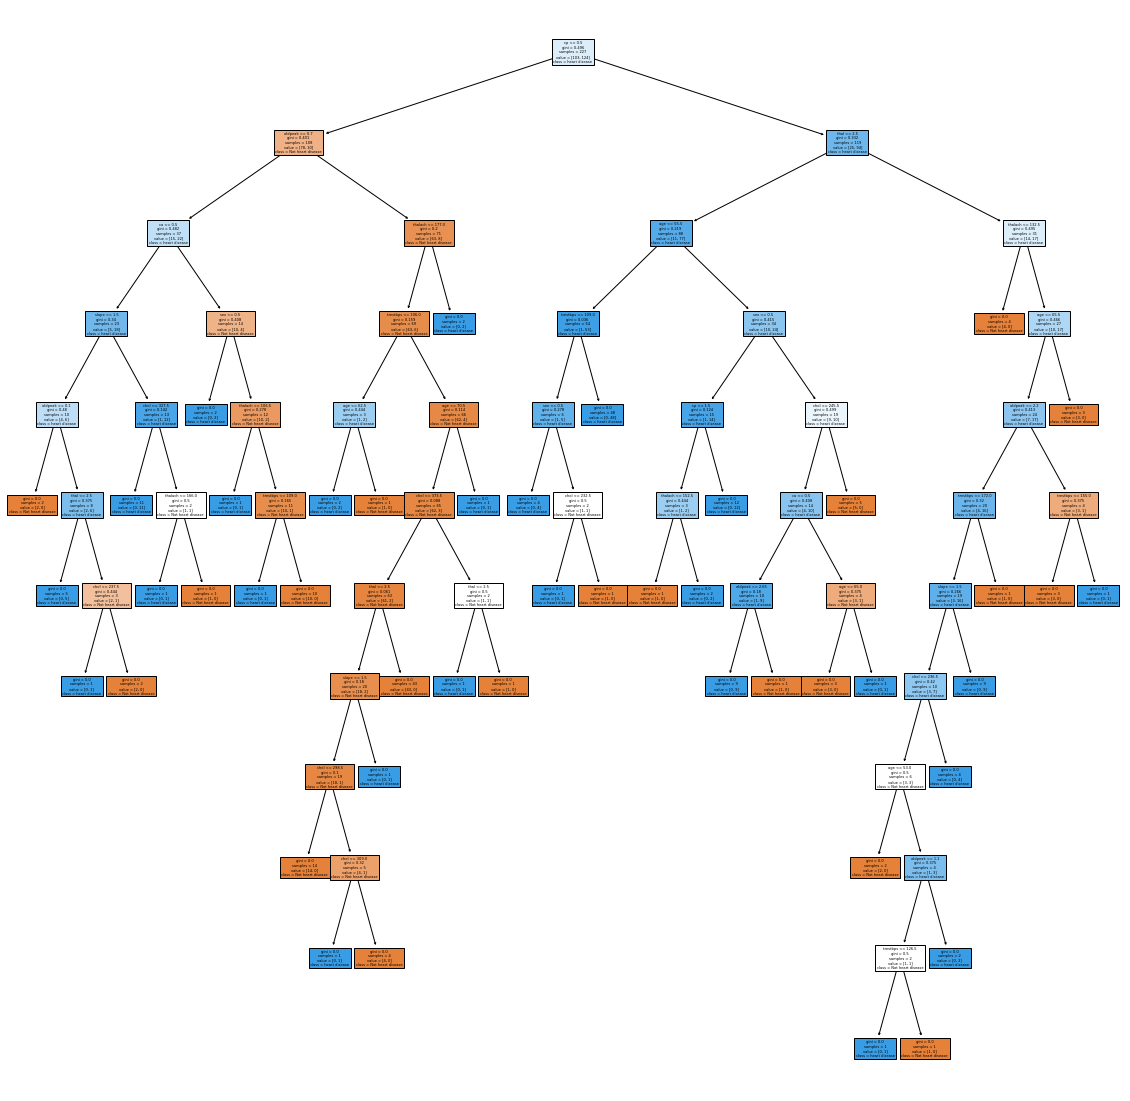

In [14]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

Train score 1.0
Test score 0.8026315789473685
Train Confusion matrix


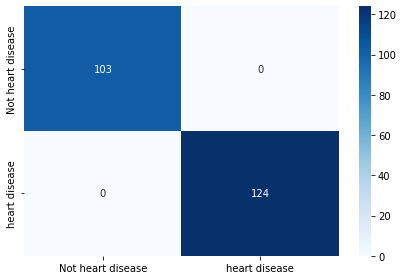

Test Confusion matrix


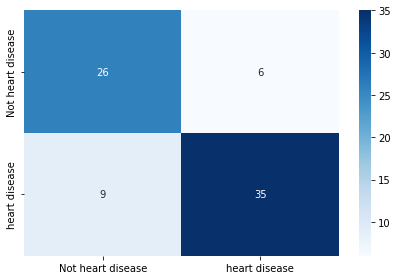

In [6]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

We can see that in our train data we have 100% accuracy (100 % precison and recall). But in test data model is not well generalizing. We have just 75% accuracy. Over model is clearly overfitting.

An effective way to do is that we can grid search those parameters and choose the optimum values that gives better performace on test data.

As of now we will control these parameters

max_depth: maximum depth of decision tree

min_sample_split: The minimum number of samples required to split an internal node:

min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [7]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.8678414096916299
Test score 0.7894736842105263
Train Confusion matrix


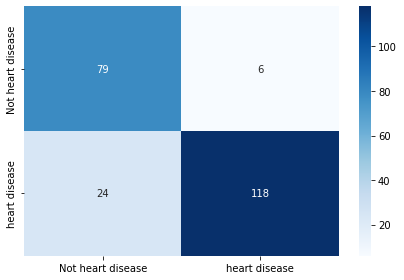

Test Confusion matrix


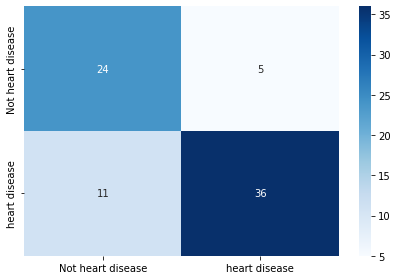

In [8]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

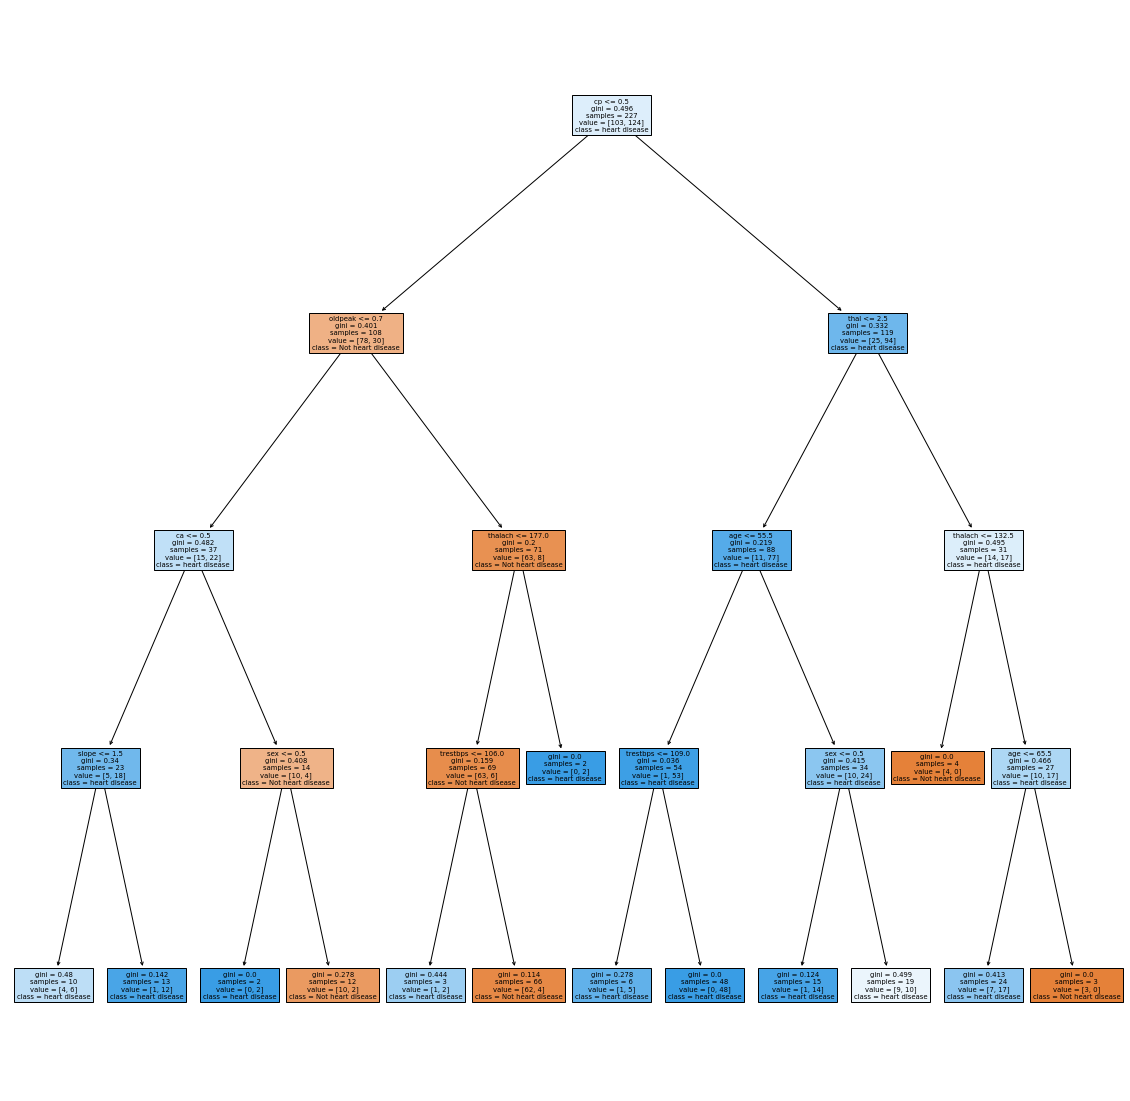

In [9]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [10]:
!pip install dtreeviz

     |████████████████████████████████| 61 kB 741 bytes/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.3-py3-none-any.whl size=67113 sha256=bc45779aea2a2b562866e40563777ac7bdbe0b840e085090cb323b589a905cb1
  Stored in directory: /root/.cache/pip/wheels/58/9d/65/e57deb90bf5440945d74bc4c19ebb14a0de2ed2b508c609673
Successfully built dtreeviz


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from dtreeviz.trees import *
import graphviz 

import warnings
warnings.filterwarnings("ignore") 
wine = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/winequalityN.csv')
wine.head()

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]

In [16]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [17]:
#features = wine.drop('type',axis=1)
#features = wine.drop('quality',axis=1)
features = wine.drop(['quality','type'],axis=1)
target = wine['quality']
features.head()

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.0              0.27         0.36  ...  3.00       0.45      8.8
1            6.3              0.30         0.34  ...  3.30       0.49      9.5
2            8.1              0.28         0.40  ...  3.26       0.44     10.1
3            7.2              0.23         0.32  ...  3.19       0.40      9.9
4            7.2              0.23         0.32  ...  3.19       0.40      9.9

[5 rows x 11 columns]

In [18]:
features.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
dtype: int64

In [19]:
cleanfeat=features.fillna(method="ffill")

In [20]:
cleanfeat.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [21]:
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeRegressor(max_depth=3)  
regr.fit(cleanfeat, target)
viz = dtreeviz(regr,
               cleanfeat,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set regression",
               fontname="Arial",
               colors = {"title":"purple"},
               scale=1.5)
viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<Figure size 1800x1440 with 0 Axes>

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


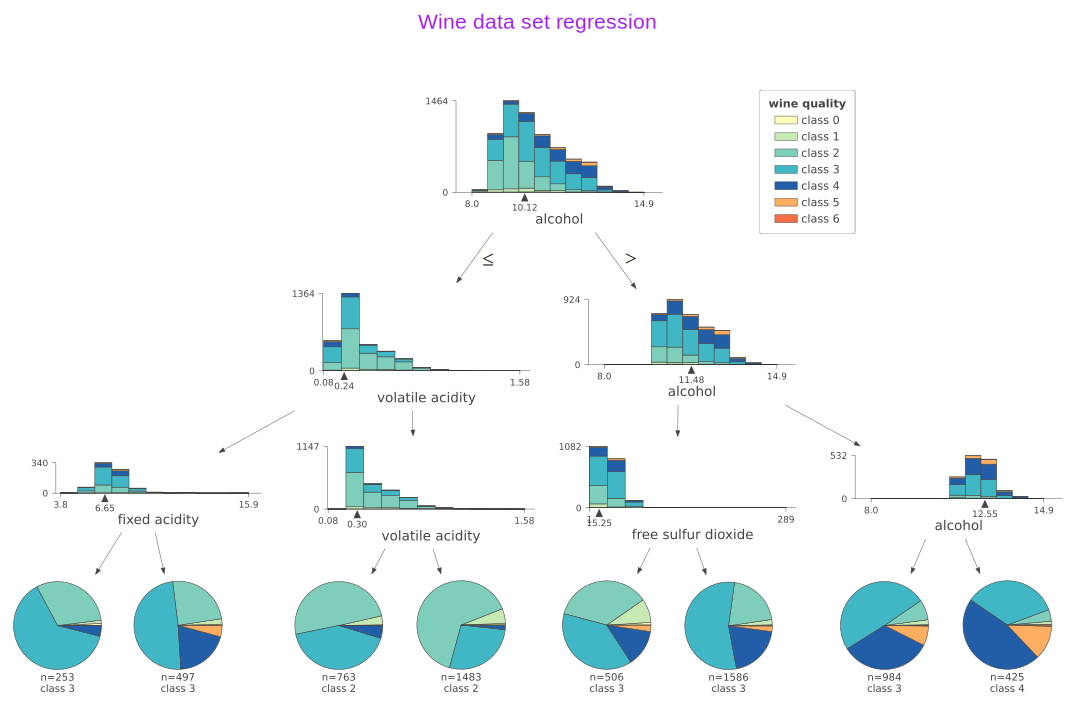

<Figure size 1800x1440 with 0 Axes>

In [22]:
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeClassifier(max_depth=3)  
regr.fit(cleanfeat, target)
viz = dtreeviz(regr,
               cleanfeat,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set regression",
               fontname="Arial",
               colors = {"title":"purple"},
               orientation='RR',
               scale=1.5)
viz

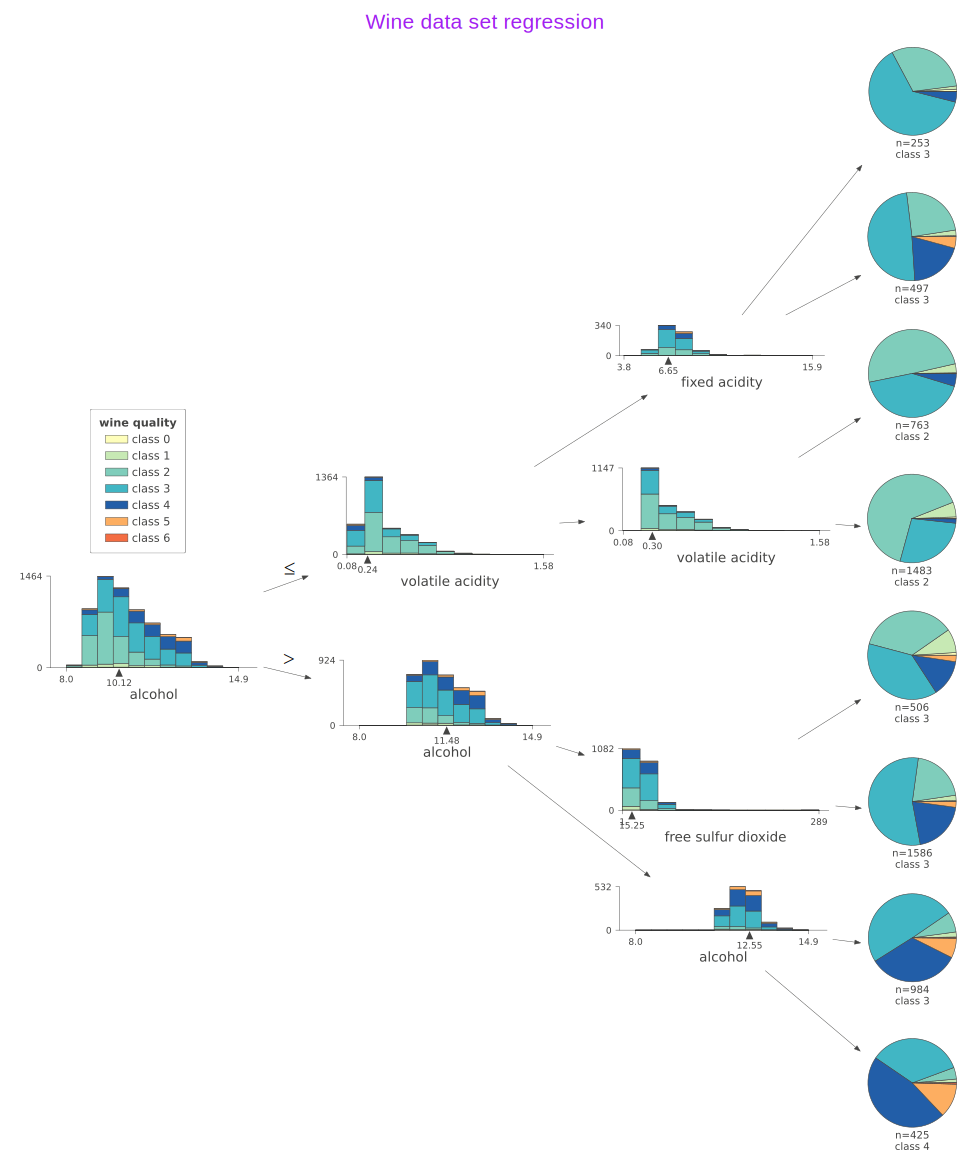

<Figure size 1800x1440 with 0 Axes>

In [23]:
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeClassifier(max_depth=3)  
regr.fit(cleanfeat, target)
viz = dtreeviz(regr,
               cleanfeat,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set regression",
               fontname="Arial",
               colors = {"title":"purple"},
               orientation='LR',
               scale=1.5)
viz